In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df=pd.read_csv("/kaggle/input/ship-fuel-consumption-and-co2-emissions-analysis/ship_fuel_efficiency.csv")

In [4]:
def explore_ship_data(df):
    print("Basic Dataset Information:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")
    print("\nColumn names:")
    print(df.columns.tolist())

    print("Data Types and Non-Null Counts:")
    print(df.info())

    print("Summary Statistics:")
    print(df.describe().T)

    print("Null Values:")
    null_counts = df.isnull().sum()
    print(null_counts[null_counts > 0])
    
    return

In [5]:
explore_ship_data(df)

Basic Dataset Information:
Number of rows: 1440
Number of columns: 10

Column names:
['ship_id', 'ship_type', 'route_id', 'month', 'distance', 'fuel_type', 'fuel_consumption', 'CO2_emissions', 'weather_conditions', 'engine_efficiency']
Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory 

In [6]:
def explore_Categorical(df):
    print("Unique Values in Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
    return

In [7]:
explore_Categorical(df)

Unique Values in Categorical Columns:

ship_id:
ship_id
NG001    12
NG002    12
NG089    12
NG088    12
NG087    12
         ..
NG036    12
NG035    12
NG034    12
NG033    12
NG120    12
Name: count, Length: 120, dtype: int64

ship_type:
ship_type
Oil Service Boat    408
Tanker Ship         408
Surfer Boat         324
Fishing Trawler     300
Name: count, dtype: int64

route_id:
route_id
Port Harcourt-Lagos    389
Lagos-Apapa            388
Escravos-Lagos         369
Warri-Bonny            294
Name: count, dtype: int64

month:
month
January      120
February     120
March        120
April        120
May          120
June         120
July         120
August       120
September    120
October      120
November     120
December     120
Name: count, dtype: int64

fuel_type:
fuel_type
Diesel    899
HFO       541
Name: count, dtype: int64

weather_conditions:
weather_conditions
Calm        516
Stormy      462
Moderate    462
Name: count, dtype: int64


# Descriptive Statistics

In [8]:
descriptive_stats = df[['fuel_consumption', 'CO2_emissions', 'engine_efficiency']].describe()
# Display descriptive statistics
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       fuel_consumption  CO2_emissions  engine_efficiency
count       1440.000000    1440.000000        1440.000000
mean        4844.246535   13365.454882          82.582924
std         4892.352813   13567.650118           7.158289
min          237.880000     615.680000          70.010000
25%         1837.962500    4991.485000          76.255000
50%         3060.880000    8423.255000          82.775000
75%         4870.675000   13447.120000          88.862500
max        24648.520000   71871.210000          94.980000


In [9]:
def Distribution_Numerical(df):
    print("Distribution of Numerical Variables:")
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_columns].hist(figsize=(15, 10), bins=20)
    plt.tight_layout()
    plt.show()

    print("Correlation Heatmap:")
 
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

    print("Box Plots for Numerical Variables:")
    df[numerical_columns].boxplot(figsize=(10, 5))
    plt.title("Box Plots of Numerical Variables")
    plt.xticks(rotation=45)
    plt.show()
    return

Distribution of Numerical Variables:


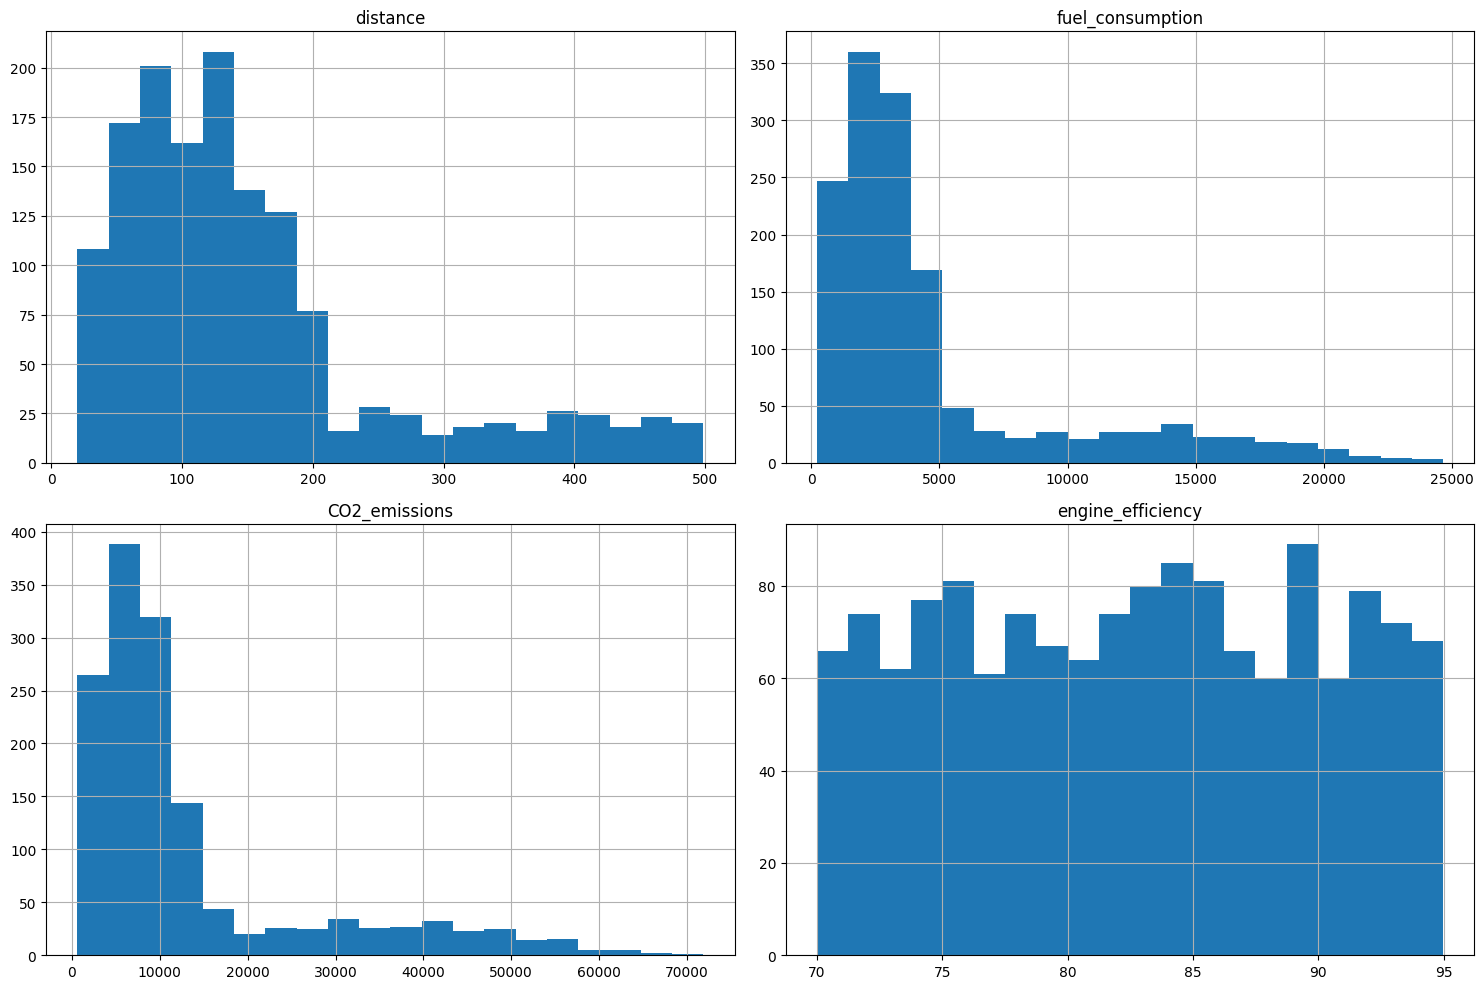

Correlation Heatmap:


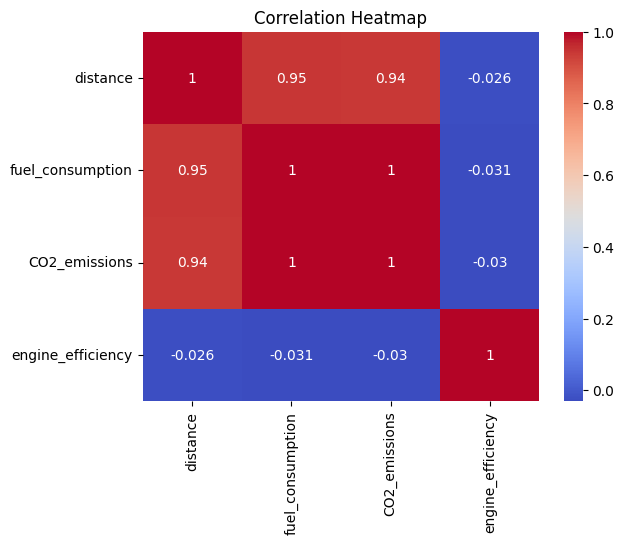

Box Plots for Numerical Variables:


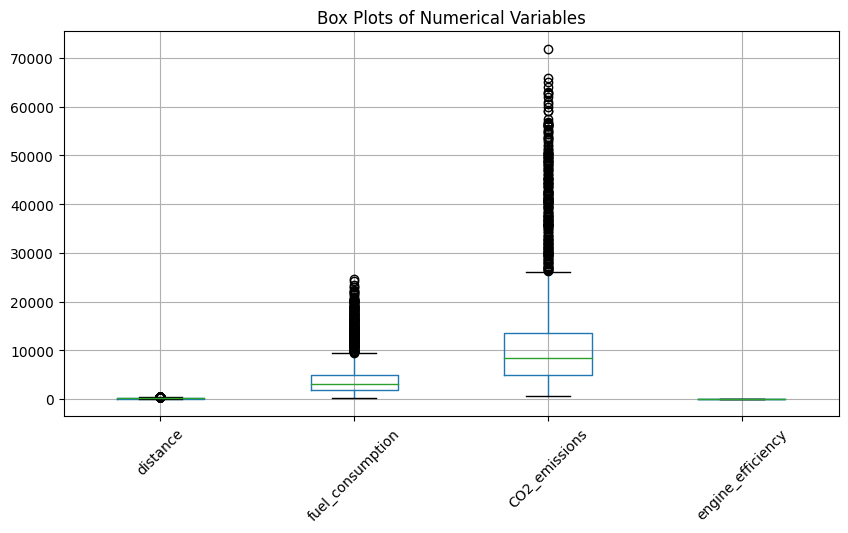

In [10]:
Distribution_Numerical(df)

Text(0.5, 1.0, 'CO2 Emissions Boxplot')

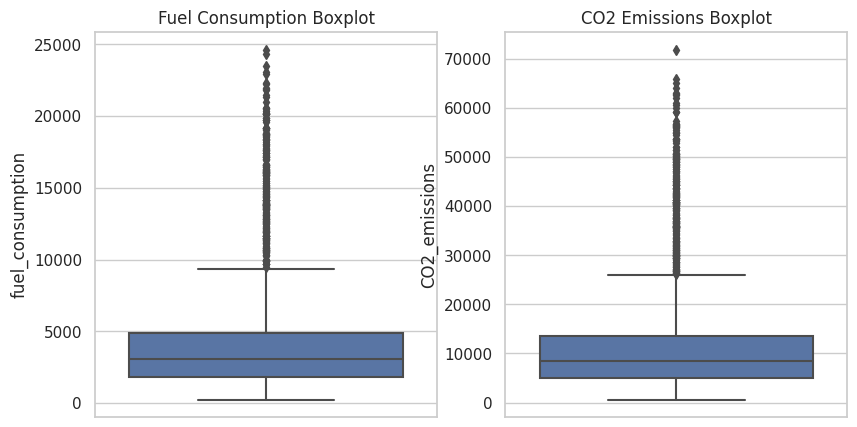

In [11]:
sns.set(style="whitegrid")


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['fuel_consumption'])
plt.title('Fuel Consumption Boxplot')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['CO2_emissions'])
plt.title('CO2 Emissions Boxplot')

# Feature Selection

In [12]:
# Encode categorical columns
categorical_cols = ['ship_id', 'ship_type', 'route_id', 'month', 'fuel_type', 'weather_conditions']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check correlation with fuel_consumption
correlation = df.corr()['fuel_consumption'].sort_values(ascending=False)
print("Correlation with fuel_consumption:\n", correlation)

# Feature importance using Random Forest
X = df.drop(columns=['fuel_consumption'])
y = df['fuel_consumption']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor for feature importance

model = RandomForestRegressor(
    n_estimators=100,       # Number of trees
    max_depth=10,           # Limit tree depth
    min_samples_split=5,    # Minimum samples to split a node
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Correlation with fuel_consumption:
 fuel_consumption      1.000000
CO2_emissions         0.997247
distance              0.945100
ship_type             0.551183
fuel_type             0.139455
ship_id               0.009350
month                 0.004362
engine_efficiency    -0.031269
weather_conditions   -0.031311
route_id             -0.044264
Name: fuel_consumption, dtype: float64
Feature Importance:
               Feature  Importance
6       CO2_emissions    0.996098
4            distance    0.001559
8   engine_efficiency    0.000708
0             ship_id    0.000620
3               month    0.000470
2            route_id    0.000246
7  weather_conditions    0.000204
5           fuel_type    0.000055
1           ship_type    0.000041


# Credit:

https://www.kaggle.com/code/jijagallery/fuel-consumption-predictor/notebook